<a href="https://colab.research.google.com/github/deepme987/Masked-Face-Verification/blob/main/MaskedFaceVerification%20-%20Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Masked Face Verification | byteiota

This notebook was used for analysis of various SOTA Face Verificaiton models to find how they hold up with generalized use cases (masked and unmasked faces).

Link to blog: https://byteiota.com/masked-face-verification/

### Datasets used: 

**LFW:** http://vis-www.cs.umass.edu/lfw/

**MLFW:** http://whdeng.cn/mlfw/

# Dataset Initialization

Here, we download the dataset and clean the parts that we require. We also expore some random images from the dataset and have a quick overview of the same.

### Downlaod

In [ ]:
!wget http://vis-www.cs.umass.edu/lfw/lfw.tgz
!tar -xvzf lfw.tgz

!unzip MLFW
!mv aligned/ mlfw/

# We then manually download the lfw train and test pairs since they don't 
# come along with the dataset; link: http://vis-www.cs.umass.edu/lfw/

### Exploration


/content/drive/MyDrive/Colab Notebooks/iDLS/FaceVerification/datasets


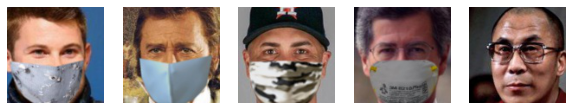

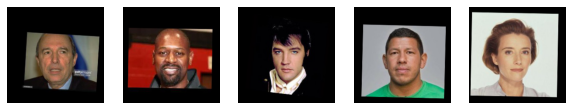

In [ ]:
# Visualize random images from both datasets

%cd /content/drive/MyDrive/FaceVerification/datasets

import random
from IPython.display import Image

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def grid_display(list_of_images, no_of_columns=2, figsize=(10,10)):

    fig = plt.figure(figsize=figsize)
    column = 0
    for i in range(len(list_of_images)):
        column += 1
        #  check for end of column and create a new figure
        if column == no_of_columns+1:
            fig = plt.figure(figsize=figsize)
            column = 1
        fig.add_subplot(1, no_of_columns, column)
        plt.imshow(list_of_images[i])
        plt.axis('off')

for path in ["mlfw/", "lfw/"]:
  images = random.choices(os.listdir(path), k=5)
  grid_display([mpimg.imread(path + image) for image in images], no_of_columns=5)

### Reading data from all files

In [ ]:
import os
import numpy as np
import pandas as pd

# Reading MLFW

with open("mlfw_pairs.txt", 'r') as fil:
    data = fil.read().split("\n")
    
data = np.array([line.split("\t") for line in data])
mlfw = pd.DataFrame(data, columns=["img1", "img2", "label"])
mlfw["source"] = "mlfw"


In [ ]:
# Reading LFW train

with open("lfw_train.txt", 'r') as fil:
    data = fil.read().split("\n")
    

lines = []
for line in data:
    line = line.split("\t")
    if len(line) == 3:
        lines.append([line[0] + "_" + str(line[1]).zfill(4) + ".png", line[0] + "_" + str(line[2]).zfill(4) + ".png", 1])
    else:
        lines.append([line[0] + "_" + str(line[1]).zfill(4) + ".png", line[2] + "_" + str(line[3]).zfill(4) + ".png", 0])
lines = np.array(lines)
lfw_train = pd.DataFrame(lines, columns=["img1", "img2", "label"])

In [ ]:
# Reading LFW test

with open("lfw_test.txt", 'r') as fil:
    data = fil.read().split("\n")
    

lines = []
for line in data:
    line = line.split("\t")
    if len(line) == 3:
        lines.append([line[0] + "_" + str(line[1]).zfill(4) + ".png", line[0] + "_" + str(line[2]).zfill(4) + ".png", 1])
    else:
        lines.append([line[0] + "_" + str(line[1]).zfill(4) + ".png", line[2] + "_" + str(line[3]).zfill(4) + ".png", 0])
lines = np.array(lines)
lfw_test = pd.DataFrame(lines, columns=["img1", "img2", "label"])
lfw_test

In [ ]:
# Add the source tag to differentiate

lfw = pd.concat([lfw_train, lfw_test])
lfw["source"] = "lfw"

### Merge and combine

In [ ]:
# Merge both datasets

data = pd.concat([mlfw, lfw])
from sklearn.utils import shuffle
data = shuffle(data)
data = data[["img1", "img2", "source", "label"]]
data

,img1,img2,source,label
454,Demi_Moore_0001_0001.jpg,Jennifer_Garner_0004_0003.jpg,mlfw,0
1804,Jack_Valenti_0001.png,Jaouad_Gharib_0001.png,lfw,0
3006,Gordon_Lightfoot_0001_0000.jpg,Gordon_Lightfoot_0004_0000.jpg,mlfw,1
5119,Ben_Howland_0002_0000.jpg,Herb_Sendek_0002_0000.jpg,mlfw,0
3900,Eric_Hinske_0004_0001.jpg,Lance_Bass_0002_0000.jpg,mlfw,0
...,...,...,...,...
3582,Chris_Cookson_0003_0003.jpg,Jean-David_Levitte_0002_0003.jpg,mlfw,0
3175,Pascal_Rheaume_0001_0000.jpg,Pascal_Rheaume_0004_0000.jpg,mlfw,1
1483,Teresa_Heinz_Kerry_0001_0000.jpg,Teresa_Heinz_Kerry_0004_0000.jpg,mlfw,1
5139,Cedric_Benson_0002_0000.jpg,Tracy_McGrady_0002_0000.jpg,mlfw,0


In [ ]:
from sklearn.utils import shuffle

data = shuffle(data)

In [ ]:
import os
import shutil


# The directory for MLFW and LFW are different. Hence we re-format MLFW images
# to match with the same as LFW

i = 0
fil = "mlfw/"
def extract_name(row):
    if row[2] == "mlfw":
        folder = "mlfw/"
        
        name1 = row["img1"][:row["img1"].index("0")][:-2] + "/"
        name2 = row["img2"][:row["img2"].index("0")][:-2] + "/"
        
        if not os.path.exists(fil + name1):
            os.mkdir(fil + name1)
        if not os.path.exists(fil + name2):
            os.mkdir(fil + name2)
        
        shutil.copyfile(fil + row["img1"], fil + name1 + row["img1"])
        shutil.copyfile(fil + row["img2"], fil + name2 + row["img2"])


### Save the combined dataset

In [ ]:
# Converting image names to path to the image (your path may vary)

def get_name(img_name):
    return img_name[:img_name.index("0")][:-1] + "/"

def apply_names(row):
    row["img1"] = f'combined/{get_name(row["img1"])}{row["img1"]}'
    row["img2"] = f'combined/{get_name(row["img2"])}{row["img2"]}'
    return row

data = data.replace({".jpg": ".png"}, regex=True)
data = data.apply(apply_names, axis=1)
data.to_csv("data.csv", index=False)


# Pre-processing for evaluation

### Pre-procsseing for baseline models

In [ ]:
from deepface import DeepFace

In [ ]:
import pandas as pd
import numpy as np
import os

data = pd.read_csv("data.csv")
data

,img1,img2,source,label
0,combined/Ben_Affleck/Ben_Affleck_0001.png,combined/Ben_Affleck/Ben_Affleck_0003.png,lfw,1
1,combined/Jean-Claude_Trichet/Jean-Claude_Trich...,combined/Michael_Douglas/Michael_Douglas_0004_...,mlfw,0
2,combined/Dave_Campo/Dave_Campo_0002_0001.png,combined/Jay_Rasulo/Jay_Rasulo_0001_0004.png,mlfw,0
3,combined/Diana_Krall/Diana_Krall_0001.png,combined/Diana_Krall/Diana_Krall_0003.png,lfw,1
4,combined/Lee_Yuan-tseh/Lee_Yuan-tseh_0004_0001...,combined/Wen_Jiabao/Wen_Jiabao_0002_0001.png,mlfw,0
...,...,...,...,...
9195,combined/Tommy_Robredo/Tommy_Robredo_0001.png,combined/Tommy_Robredo/Tommy_Robredo_0003.png,lfw,1
9196,combined/William_Nessen/William_Nessen_0001_00...,combined/William_Nessen/William_Nessen_0003_00...,mlfw,1
9197,combined/Elin_Nordegren/Elin_Nordegren_0001.png,combined/Elin_Nordegren/Elin_Nordegren_0002.png,lfw,1
9198,combined/Tyrone_Medley/Tyrone_Medley_0001_0000...,combined/Tyrone_Medley/Tyrone_Medley_0002_0000...,mlfw,1


In [ ]:
# Split into train and test sets

from sklearn.model_selection import train_test_split

X = data[["img1", "img2"]]
y = data["label"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
test = X_test
test["label"] = y_test
test

,img1,img2,label
8021,combined/Lee_Nam-shin/Lee_Nam-shin_0001.png,combined/Nick_Nolte/Nick_Nolte_0001.png,0
3416,combined/Ruben_Studdard/Ruben_Studdard_0001_00...,combined/Ruben_Studdard/Ruben_Studdard_0004_00...,1
5392,combined/Emanuel_Ginobili/Emanuel_Ginobili_000...,combined/Richard_Krajicek/Richard_Krajicek_000...,0
5660,combined/Aleksander_Voloshin/Aleksander_Volosh...,combined/Ashlea_Talbot/Ashlea_Talbot_0001.png,0
6271,combined/Adolfo_Aguilar_Zinser/Adolfo_Aguilar_...,combined/Joschka_Fischer/Joschka_Fischer_0002_...,0
...,...,...,...
1406,combined/Nastassia_Kinski/Nastassia_Kinski_000...,combined/Raquel_Welch/Raquel_Welch_0002_0002.png,0
7132,combined/Jorge_Alberto_Galindo/Jorge_Alberto_G...,combined/Omar_Sharif/Omar_Sharif_0002.png,0
8820,combined/Martin_Short/Martin_Short_0001_0000.png,combined/Martin_Short/Martin_Short_0003_0000.png,1
746,combined/Franck_Cerutti/Franck_Cerutti_0001.png,combined/Sheldon_Silver/Sheldon_Silver_0001.png,0


In [ ]:
test = test.reset_index()
test = test.drop("index", axis=1)
test

,img1,img2,label
0,combined/Lee_Nam-shin/Lee_Nam-shin_0001.png,combined/Nick_Nolte/Nick_Nolte_0001.png,0
1,combined/Ruben_Studdard/Ruben_Studdard_0001_00...,combined/Ruben_Studdard/Ruben_Studdard_0004_00...,1
2,combined/Emanuel_Ginobili/Emanuel_Ginobili_000...,combined/Richard_Krajicek/Richard_Krajicek_000...,0
3,combined/Aleksander_Voloshin/Aleksander_Volosh...,combined/Ashlea_Talbot/Ashlea_Talbot_0001.png,0
4,combined/Adolfo_Aguilar_Zinser/Adolfo_Aguilar_...,combined/Joschka_Fischer/Joschka_Fischer_0002_...,0
...,...,...,...
1835,combined/Nastassia_Kinski/Nastassia_Kinski_000...,combined/Raquel_Welch/Raquel_Welch_0002_0002.png,0
1836,combined/Jorge_Alberto_Galindo/Jorge_Alberto_G...,combined/Omar_Sharif/Omar_Sharif_0002.png,0
1837,combined/Martin_Short/Martin_Short_0001_0000.png,combined/Martin_Short/Martin_Short_0003_0000.png,1
1838,combined/Franck_Cerutti/Franck_Cerutti_0001.png,combined/Sheldon_Silver/Sheldon_Silver_0001.png,0


### Save test set

In [ ]:
# Saving test file for consistency in future usage
# We'll be reading this file for the evaluation below

test.to_csv("test.csv", index=False)

# Baseline: Evaluation on Pre-Trained models 

## DeepFace

Now that we have our dataset ready and combined, we can use the DeepFace library to make our evaluation on combined dataset using pre-trained models

DeepFace: https://github.com/serengil/deepface/

DeepFace is a Face Recognition toolkit in python that allows us to use multiple models for face recognition tasks. It can be considered as an API that wraps all the lower-level code.

After collecting the data, we can evalute the performance on our selected models.

### VGG-Face

In [ ]:
score = 0
total = 0
errors = 0
results = []

_start = time.time()
for row in test.iterrows():
    if not (os.path.exists(row[1][0]) and os.path.exists(row[1][1])):
        continue
    total += 1
    try:
        result = DeepFace.verify(img1_path=row[1][0], img2_path=row[1][1], model_name="VGG-Face")
        if int(result['verified']) == row[1][2]:
            score += 1
        results.append(result)
    except ValueError as e:
        errors += 1

print("Time taken: ", time.time() - _start)
score, total, score/total, errors, score / (total - errors)

Time taken:  270.4649202823639


(823, 1758, 0.4681456200227531, 665, 0.7529734675205856)

### Google FaceNet

In [ ]:
score = 0
total = 0
errors = 0
results = []

_start = time.time()
for row in test.iterrows():
    if not (os.path.exists(row[1][0]) and os.path.exists(row[1][1])):
        continue
    total += 1
    try:
        result = DeepFace.verify(img1_path=row[1][0], img2_path=row[1][1], model_name="Facenet")
        if int(result['verified']) == row[1][2]:
            score += 1
        results.append(result)
    except ValueError as e:
        errors += 1

print("Time taken: ", time.time() - _start)
score, total, score/total, errors, score / (total - errors)

Time taken:  209.47827410697937


(769, 1758, 0.43742889647326505, 665, 0.7035681610247027)

### Dlib Python

In [ ]:
score = 0
total = 0
errors = 0
results = []

_start = time.time()
for row in test.iterrows():
    if not (os.path.exists(row[1][0]) and os.path.exists(row[1][1])):
        continue
    total += 1
    try:
        result = DeepFace.verify(img1_path=row[1][0], img2_path=row[1][1], model_name="Dlib")
        if int(result['verified']) == row[1][2]:
            score += 1
        results.append(result)
    except ValueError as e:
        errors += 1

print("Time taken: ", time.time() - _start)
score, total, score/total, errors, score / (total - errors)

Time taken:  76.08434700965881


(846, 1758, 0.4812286689419795, 665, 0.7740164684354987)

### ArcFace

In [ ]:
score = 0
total = 0
errors = 0
results = []

_start = time.time()
for row in test.iterrows():
    if not (os.path.exists(row[1][0]) and os.path.exists(row[1][1])):
        continue
    total += 1
    try:
        result = DeepFace.verify(img1_path=row[1][0], img2_path=row[1][1], model_name="ArcFace")
        if int(result['verified']) == row[1][2]:
            score += 1
        results.append(result)
    except ValueError as e:
        errors += 1

print("Time taken: ", time.time() - _start)
score, total, score/total, errors, score / (total - errors)

Time taken:  227.17536067962646


(859, 1758, 0.48862343572241185, 665, 0.7859103385178408)

As we see above, we get a score of 70-78.5% using the pre-trained models on our data

# Aggregation: An approach to tackle masked verification by aggregating the results on multiple images

## Pre-process

In [ ]:
import numpy as np
import pandas as pd

# We read the same test file saved above

data = pd.read_csv("test.csv")
data

,img1,img2,label
0,combined/Lee_Nam-shin/Lee_Nam-shin_0001.png,combined/Nick_Nolte/Nick_Nolte_0001.png,0
1,combined/Ruben_Studdard/Ruben_Studdard_0001_00...,combined/Ruben_Studdard/Ruben_Studdard_0004_00...,1
2,combined/Emanuel_Ginobili/Emanuel_Ginobili_000...,combined/Richard_Krajicek/Richard_Krajicek_000...,0
3,combined/Aleksander_Voloshin/Aleksander_Volosh...,combined/Ashlea_Talbot/Ashlea_Talbot_0001.png,0
4,combined/Adolfo_Aguilar_Zinser/Adolfo_Aguilar_...,combined/Joschka_Fischer/Joschka_Fischer_0002_...,0
...,...,...,...
1835,combined/Nastassia_Kinski/Nastassia_Kinski_000...,combined/Raquel_Welch/Raquel_Welch_0002_0002.png,0
1836,combined/Jorge_Alberto_Galindo/Jorge_Alberto_G...,combined/Omar_Sharif/Omar_Sharif_0002.png,0
1837,combined/Martin_Short/Martin_Short_0001_0000.png,combined/Martin_Short/Martin_Short_0003_0000.png,1
1838,combined/Franck_Cerutti/Franck_Cerutti_0001.png,combined/Sheldon_Silver/Sheldon_Silver_0001.png,0


In [ ]:
import os

# There were some images that did not have a MTCNN face extraction.
# We remove those to reduce the number of errors

def exists(row):
    if os.path.exists(row[1]) and os.path.exists(row[0]):
        return True
    return False

data = data[data.apply(exists, axis=1)]
data = data.reset_index()
data = data.drop("index", axis=1)

In our approach, we test an image against multiple images (masked and unmasked) of the same person.

This means we now have only one input image and multiple train images.

We this convert our 1840 rows (1758 after cleaning) in test to 3516 - each row has 2 images belonging to 2 people

In [ ]:
def get_name(img_name):
    return img_name[:img_name.index("0")][:-1].split("/")[-1]

def extract_name(row):    
    return get_name(row[0])
data["name"] = data.apply(extract_name, axis=1)
data

,img1,img2,label,name,name2
0,combined/Lee_Nam-shin/Lee_Nam-shin_0001.png,combined/Nick_Nolte/Nick_Nolte_0001.png,0,Lee_Nam-shin,Nick_Nolte
1,combined/Emanuel_Ginobili/Emanuel_Ginobili_000...,combined/Richard_Krajicek/Richard_Krajicek_000...,0,Emanuel_Ginobili,Richard_Krajicek
2,combined/Aleksander_Voloshin/Aleksander_Volosh...,combined/Ashlea_Talbot/Ashlea_Talbot_0001.png,0,Aleksander_Voloshin,Ashlea_Talbot
3,combined/Adolfo_Aguilar_Zinser/Adolfo_Aguilar_...,combined/Joschka_Fischer/Joschka_Fischer_0002_...,0,Adolfo_Aguilar_Zinser,Joschka_Fischer
4,combined/Ann_Veneman/Ann_Veneman_0005.png,combined/Ann_Veneman/Ann_Veneman_0011.png,1,Ann_Veneman,Ann_Veneman
...,...,...,...,...,...
1753,combined/Nastassia_Kinski/Nastassia_Kinski_000...,combined/Raquel_Welch/Raquel_Welch_0002_0002.png,0,Nastassia_Kinski,Raquel_Welch
1754,combined/Jorge_Alberto_Galindo/Jorge_Alberto_G...,combined/Omar_Sharif/Omar_Sharif_0002.png,0,Jorge_Alberto_Galindo,Omar_Sharif
1755,combined/Martin_Short/Martin_Short_0001_0000.png,combined/Martin_Short/Martin_Short_0003_0000.png,1,Martin_Short,Martin_Short
1756,combined/Franck_Cerutti/Franck_Cerutti_0001.png,combined/Sheldon_Silver/Sheldon_Silver_0001.png,0,Franck_Cerutti,Sheldon_Silver


In [ ]:
df1 = data[["img1", "name2", "label"]]
df2 = data[["img2", "name", "label"]]
df2.columns = ["img1", "name2", "label"]
data = df1.append(df2, ignore_index=True)
data.to_csv("test_filtered.csv", index=False)

In [ ]:
data

,img,name,label
0,combined/Lee_Nam-shin/Lee_Nam-shin_0001.png,Nick_Nolte,0
1,combined/Emanuel_Ginobili/Emanuel_Ginobili_000...,Richard_Krajicek,0
2,combined/Aleksander_Voloshin/Aleksander_Volosh...,Ashlea_Talbot,0
3,combined/Adolfo_Aguilar_Zinser/Adolfo_Aguilar_...,Joschka_Fischer,0
4,combined/Ann_Veneman/Ann_Veneman_0005.png,Ann_Veneman,1
...,...,...,...
3511,combined/Raquel_Welch/Raquel_Welch_0002_0002.png,Nastassia_Kinski,0
3512,combined/Omar_Sharif/Omar_Sharif_0002.png,Jorge_Alberto_Galindo,0
3513,combined/Martin_Short/Martin_Short_0003_0000.png,Martin_Short,1
3514,combined/Sheldon_Silver/Sheldon_Silver_0001.png,Franck_Cerutti,0


With this, we proces sthe data to be fed into our aggregation code

In [ ]:
# DeepFace verify example

from deepface import DeepFace

DeepFace.verify(img1_path="combined/Aaron_Eckhart/Aaron_Eckhart_0002_0000.png", img2_path="combined/Aaron_Eckhart/Aaron_Eckhart_0001_0000.png")

{'verified': True,
 'distance': 0.34412670676029955,
 'max_threshold_to_verify': 0.4,
 'model': 'VGG-Face',
 'similarity_metric': 'cosine'}

### VGG-Face

In [ ]:
# Following the similar pattern from previous evaluation, we now test 
# an image on multiple images and aggregate them based on their closet 3

import time

score = 0
total = 0
errors = 0
results = []

MODEL_NAME = "VGG-Face"

# Dummy example to retrieve max_threshold for the model 
# This can be further fine-tuned for better results

max_threshold = DeepFace.verify(img1_path="combined/Aaron_Eckhart/Aaron_Eckhart_0001.png", 
                                img2_path="combined/Aaron_Eckhart/Aaron_Eckhart_0001.png", 
                                model_name=MODEL_NAME)["max_threshold_to_verify"]

_start = time.time()
for row in data.iterrows():
    if row[0] % 100 == 0:
        print(f"{row[0]} / {data.shape[0]}")
        try:
            print(score, total, score/total, errors, score / (total - errors))
        except:
            pass
    if not os.path.exists(row[1][0]):
        continue
    total += 1
    imgs = os.listdir("combined/" + row[1][1])
    temp_res = []
    error = 0
    for img in imgs:
        try:
            temp = DeepFace.verify(img1_path=row[1][0], img2_path="combined/" + row[1][1] + "/" + img, model_name=MODEL_NAME)
            temp_res.append(temp['distance'])
        except ValueError as e:
            error = 1
    if temp_res:
        temp_res.sort()
        temp_res = temp_res[:3]
        val = sum(temp_res) / min(3, len(temp_res))
        result = bool(val <= max_threshold)
        results.append([result, row[1][2], row[0], temp_res])

        if result == row[1][2]:
            score += 1
    elif error:
        errors += 1

print(time.time() - _start)
score, total, score/total, errors, score / (total - errors)


0 / 3516
100 / 3516
63 100 0.63 22 0.8076923076923077
200 / 3516
127 200 0.635 46 0.8246753246753247
300 / 3516
199 300 0.6633333333333333 61 0.8326359832635983
400 / 3516
260 400 0.65 85 0.8253968253968254
500 / 3516
321 500 0.642 109 0.8209718670076727
600 / 3516
383 600 0.6383333333333333 132 0.8183760683760684
700 / 3516
444 700 0.6342857142857142 154 0.8131868131868132
800 / 3516
518 800 0.6475 172 0.8248407643312102
900 / 3516
587 900 0.6522222222222223 191 0.8279266572637518
1000 / 3516
649 1000 0.649 214 0.8256997455470738
1100 / 3516
718 1100 0.6527272727272727 229 0.8243398392652124
1200 / 3516
783 1200 0.6525 249 0.8233438485804416
1300 / 3516
849 1300 0.6530769230769231 268 0.8226744186046512
1400 / 3516
907 1400 0.6478571428571429 292 0.8185920577617328
1500 / 3516
975 1500 0.65 310 0.819327731092437
1600 / 3516
1034 1600 0.64625 335 0.8173913043478261
1700 / 3516
1097 1700 0.6452941176470588 363 0.8204936424831712
1800 / 3516
1159 1800 0.6438888888888888 384 0.81850282485

(2236, 3516, 0.6359499431171786, 800, 0.8232695139911634)

### Google FaceNet

In [ ]:
score = 0
total = 0
errors = 0
results = []

MODEL_NAME = "Facenet"

max_threshold = DeepFace.verify(img1_path="combined/Aaron_Eckhart/Aaron_Eckhart_0001.png", 
                                img2_path="combined/Aaron_Eckhart/Aaron_Eckhart_0001.png", 
                                model_name=MODEL_NAME)["max_threshold_to_verify"]
_start = time.time()

for row in data.iterrows():
    if row[0] % 100 == 0:
        print(f"{row[0]} / {data.shape[0]}")
        try:
            print(score, total, score/total, errors, score / (total - errors))
        except:
            pass
    if not os.path.exists(row[1][0]):
        continue
    total += 1
    imgs = os.listdir("combined/" + row[1][1])
    temp_res = []
    error = 0
    for img in imgs:
        try:
            temp = DeepFace.verify(img1_path=row[1][0], img2_path="combined/" + row[1][1] + "/" + img, model_name=MODEL_NAME)
            temp_res.append(temp['distance'])
        except ValueError as e:
            error = 1
    if temp_res:
        temp_res.sort()
        temp_res = temp_res[:3]
        val = sum(temp_res) / min(3, len(temp_res))
        result = bool(val <= max_threshold)
        results.append([result, row[1][2], row[0], temp_res])

        if result == row[1][2]:
            score += 1
    elif error:
        errors += 1


print(time.time() - _start)        
score, total, score/total, errors, score / (total - errors)


0 / 3516
100 / 3516
71 100 0.71 22 0.9102564102564102
200 / 3516
141 200 0.705 46 0.9155844155844156
300 / 3516
218 300 0.7266666666666667 61 0.9121338912133892
400 / 3516
285 400 0.7125 85 0.9047619047619048
500 / 3516
354 500 0.708 109 0.9053708439897699
600 / 3516
423 600 0.705 132 0.9038461538461539
700 / 3516
496 700 0.7085714285714285 154 0.9084249084249084
800 / 3516
568 800 0.71 172 0.9044585987261147
900 / 3516
645 900 0.7166666666666667 191 0.9097320169252469
1000 / 3516
711 1000 0.711 214 0.9045801526717557
1100 / 3516
790 1100 0.7181818181818181 229 0.9070034443168772
1200 / 3516
863 1200 0.7191666666666666 249 0.907465825446898
1300 / 3516
931 1300 0.7161538461538461 268 0.9021317829457365
1400 / 3516
999 1400 0.7135714285714285 292 0.9016245487364621
1500 / 3516
1075 1500 0.7166666666666667 310 0.9033613445378151
1600 / 3516
1139 1600 0.711875 335 0.9003952569169961
1700 / 3516
1211 1700 0.7123529411764706 363 0.9057591623036649
1800 / 3516
1281 1800 0.7116666666666667 38

(2469, 3516, 0.7022184300341296, 800, 0.9090574374079529)

### Dlib Python

In [ ]:
score = 0
total = 0
errors = 0
results = []

max_threshold = DeepFace.verify(img1_path="combined/Aaron_Eckhart/Aaron_Eckhart_0001.png", 
                                img2_path="combined/Aaron_Eckhart/Aaron_Eckhart_0001.png", 
                                model_name="Dlib")["max_threshold_to_verify"]

_start = time.time()
for row in data.iterrows():
    if row[0] % 100 == 0:
        print(f"{row[0]} / {data.shape[0]}")
    if not os.path.exists(row[1][0]):
        continue
    total += 1
    imgs = os.listdir("combined/" + row[1][1])
    temp_res = []
    error = 0
    for img in imgs:
        try:
            temp = DeepFace.verify(img1_path=row[1][0], img2_path="combined/" + row[1][1] + "/" + img, model_name="Dlib")
            temp_res.append(temp['distance'])
        except ValueError as e:
            error = 1
    if temp_res:
        temp_res.sort()
        temp_res = temp_res[:3]
        val = sum(temp_res) / min(3, len(temp_res))
        result = bool(val <= max_threshold)
        results.append([result, row[1][2], row[0], temp_res])

        if result == row[1][2]:
            score += 1
    elif error:
        errors += 1

print(time.time() - _start)
score, total, score/total, errors, score / (total - errors)


0 / 3516
100 / 3516
200 / 3516
300 / 3516
400 / 3516
500 / 3516
600 / 3516
700 / 3516
800 / 3516
900 / 3516
1000 / 3516
1100 / 3516
1200 / 3516
1300 / 3516
1400 / 3516
1500 / 3516
1600 / 3516
1700 / 3516
1800 / 3516
1900 / 3516
2000 / 3516
2100 / 3516
2200 / 3516
2300 / 3516
2400 / 3516
2500 / 3516
2600 / 3516
2700 / 3516
2800 / 3516
2900 / 3516
3000 / 3516
3100 / 3516
3200 / 3516
3300 / 3516
3400 / 3516
3500 / 3516
981.3958449363708


(2421, 3516, 0.6885665529010239, 800, 0.8913843888070693)

### ArcFace

In [ ]:
score = 0
total = 0
errors = 0
results = []

MODEL_NAME = "ArcFace"

max_threshold = DeepFace.verify(img1_path="combined/Aaron_Eckhart/Aaron_Eckhart_0001.png", 
                                img2_path="combined/Aaron_Eckhart/Aaron_Eckhart_0001.png", 
                                model_name=MODEL_NAME)["max_threshold_to_verify"]
_start = time.time()

for row in data.iterrows():
    if row[0] % 100 == 0:
        print(f"{row[0]} / {data.shape[0]}")
        try:
            print(score, total, score/total, errors, score / (total - errors))
        except:
            pass
    if not os.path.exists(row[1][0]):
        continue
    total += 1
    imgs = os.listdir("combined/" + row[1][1])
    temp_res = []
    error = 0
    for img in imgs:
        try:
            temp = DeepFace.verify(img1_path=row[1][0], img2_path="combined/" + row[1][1] + "/" + img, model_name=MODEL_NAME)
            temp_res.append(temp['distance'])
        except ValueError as e:
            error = 1
    if temp_res:
        temp_res.sort()
        temp_res = temp_res[:3]
        val = sum(temp_res) / min(3, len(temp_res))
        result = bool(val <= max_threshold)
        results.append([result, row[1][2], row[0], temp_res])

        if result == row[1][2]:
            score += 1
    elif error:
        errors += 1


print(time.time() - _start)        
score, total, score/total, errors, score / (total - errors)

0 / 3516
100 / 3516
66 100 0.66 22 0.8461538461538461
200 / 3516
135 200 0.675 46 0.8766233766233766
300 / 3516
213 300 0.71 61 0.891213389121339
400 / 3516
280 400 0.7 85 0.8888888888888888
500 / 3516
346 500 0.692 109 0.8849104859335039
600 / 3516
413 600 0.6883333333333334 132 0.8824786324786325
700 / 3516
477 700 0.6814285714285714 154 0.8736263736263736
800 / 3516
550 800 0.6875 172 0.8757961783439491
900 / 3516
625 900 0.6944444444444444 191 0.8815232722143864
1000 / 3516
693 1000 0.693 214 0.8816793893129771
1100 / 3516
770 1100 0.7 229 0.8840413318025259
1200 / 3516
841 1200 0.7008333333333333 249 0.8843322818086226
1300 / 3516
916 1300 0.7046153846153846 268 0.8875968992248062
1400 / 3516
980 1400 0.7 292 0.8844765342960289
1500 / 3516
1052 1500 0.7013333333333334 310 0.8840336134453781
1600 / 3516
1114 1600 0.69625 335 0.8806324110671937
1700 / 3516
1178 1700 0.6929411764705883 363 0.881077038145101
1800 / 3516
1246 1800 0.6922222222222222 384 0.8799435028248588
1900 / 3516
1

(2397, 3516, 0.681740614334471, 800, 0.8825478645066274)

As we see, with the introduction of aggregation, we heavily improved our model to deal with the masked as well as unmasked dataset.

While this is still less than the LFW SOTA scores, we gained a lot on our combined dataset (from 70-77% to 80-90%)

# Results

In this section, we look over some visual results for our approach

NOTE: All the values are hard-coded from the results we got in the notebook above

## Performance (Accuracy)

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

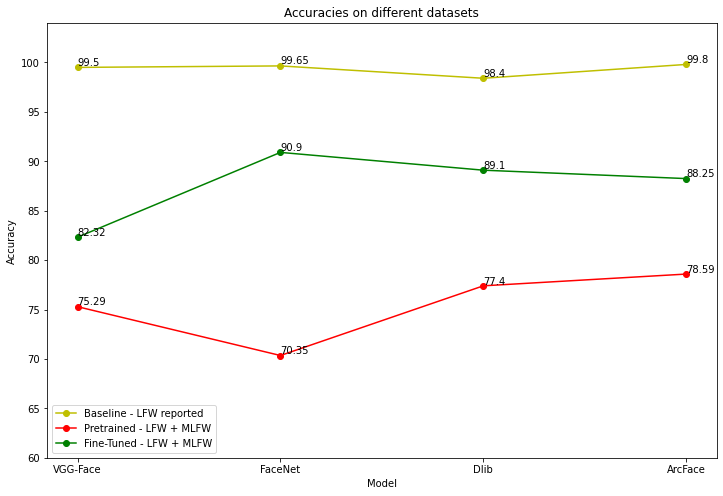

In [39]:
lfw_base = [99.5, 99.65, 98.4, 99.80]
pre_accs = [75.29, 70.35, 77.40, 78.59]
post_accs = [82.32, 90.90, 89.10, 88.25]

models = ["VGG-Face", "FaceNet", "Dlib", "ArcFace"]

plt.figure(figsize=(12, 8))
plt.plot(models, lfw_base, marker='o', color='y', label='Baseline - LFW reported')
plt.plot(models, pre_accs, marker='o', color='r', label='Pretrained - LFW + MLFW')
plt.plot(models, post_accs, marker='o', color='g', label='Fine-Tuned - LFW + MLFW')


for i, txt in enumerate(lfw_base):
    plt.annotate(txt, (models[i], 1.002 * lfw_base[i]))

for i, txt in enumerate(pre_accs):
    plt.annotate(txt, (models[i], 1.002 * pre_accs[i]))

for i, txt in enumerate(post_accs):
    plt.annotate(txt, (models[i], 1.002 * post_accs[i]))
    
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.ylim(60, 104)
plt.title("Accuracies on different datasets")

plt.legend()
# plt.savefig("Baseline.jpg")
plt.show()

## Model size

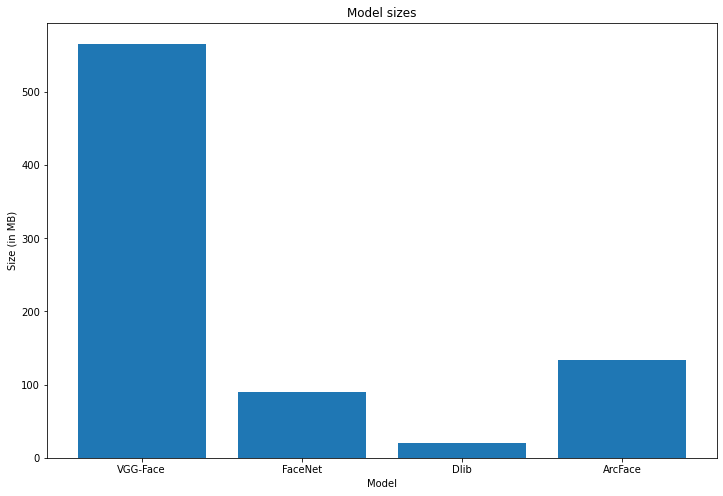

In [ ]:
sizes_mb = [566, 90, 20, 133]


plt.figure(figsize=(12, 8))

plt.bar(models, sizes_mb)

plt.xlabel("Model")
plt.ylabel("Size (in MB)")
plt.title("Model sizes")

plt.show()

## Inference Time

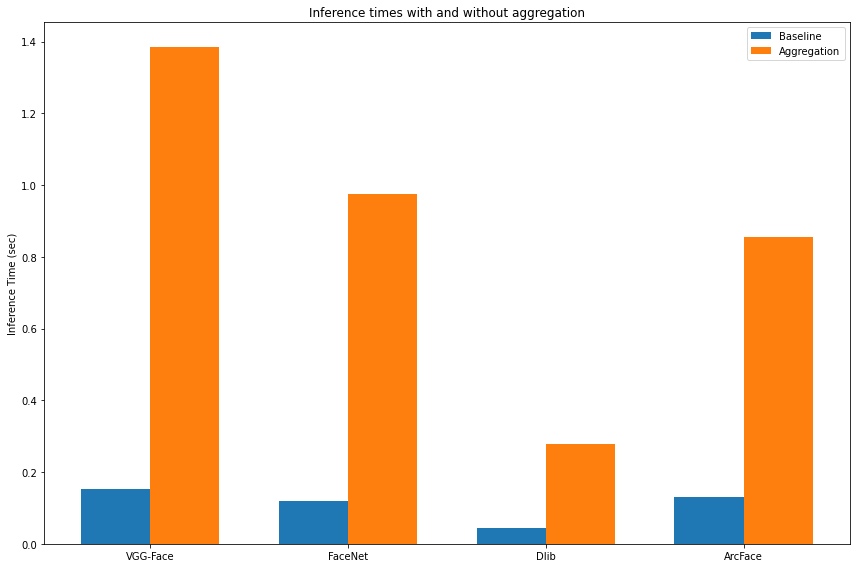

In [38]:
import numpy as np

baseline_time = np.array([270, 209, 76, 227]) / 1758
agg_time = np.array([4867, 3430, 981, 3007]) / 3516

x = np.arange(len(models))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(12,8))

rects1 = ax.bar(x, baseline_time, width, label='Baseline')
rects2 = ax.bar(x + width, agg_time, width, label='Aggregation')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Inference Time (sec)')
ax.set_title('Inference times with and without aggregation')
ax.set_xticks(x + width / 2)
ax.set_xticklabels(models)
ax.legend()

fig.tight_layout()

plt.show()

In [ ]:
agg_time

array([1.38424346, 0.97554039, 0.27901024, 0.85324232])

Here we see that however effective our aggregation approach may be, it suffers from high inference time. This makes it less likely to be used on mobile devices, however in applications where we do not require an instant authentication, aggregation may still come handy.